# Content:

#Loading and Checking Data
#Creating Models
#Logistic Regression
#KNN -K Nearest Neighbors
#SVC -Support Vector Classifier
#Naive Bayes
#Decision Tree Classifier
#Random Forest Classifier
#Evaluating Models
#Confusion Matrix
#Accuracy Score
#Conclusion

In [1]:
# Import Library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Loading and chacking data.

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#There is a id column, I will drop it right,becuse the ID, column
is meaningless for maching learning, it does not affect what the
y column is and negatively affects the performance of our models.

In [3]:
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Now it is better

In [4]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


df's type is'Data Frame' as it should be and df has 150 columns.
When the 'ID' Columns is dropped, all  columns will be of float type.

In [6]:
# HOW MANY kinds of Data are in column y, and now many of each 
#kind? let's see that.

df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

#There are 3 kinds of species, and each kind is 50 pcs.

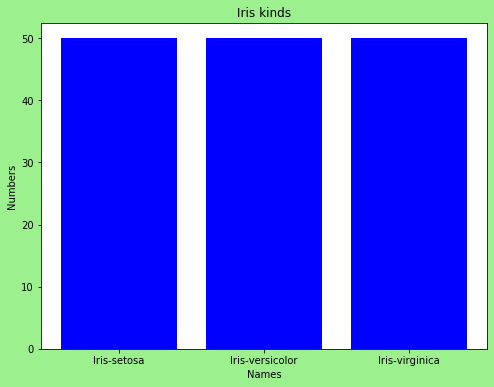

In [7]:
# let's show what we see above with a bar graph.

plt.figure(figsize = (8,6), facecolor='#9DF08E')
plt.bar(df['Species'].unique(), df['Species'].value_counts(), color='b')
plt.title('Iris kinds')
plt.xlabel('Names')
plt.ylabel('Numbers')
plt.show()

#Overall, the data distribution is very clean.

In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


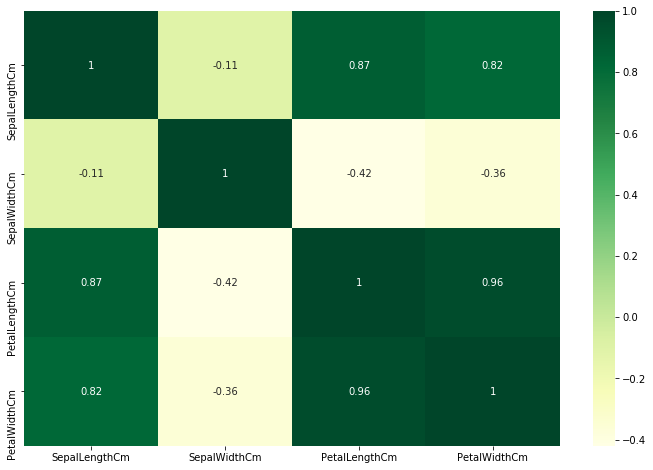

In [10]:
cor = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data = cor, annot = True, cmap = plt.cm.YlGn)
plt.show()

 The highest correlation is between petal Length Cm and Petal
WidthCm with a value of 0.96

Also the coorelation between petalLengthCm - sepalwidthCm is -0.42,
meaning that as one increases, the other decreases, and vice versa.

# Creating Models

In [11]:
# x and y assignment 
X = df.iloc[:,0:4]
y = df.iloc[:,4:]


In [12]:
# Let's see how x and y look

X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [13]:
y.head(3)

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa


#They are as they should be, nice.

In [14]:
## spliting the data Set into Independent Variables and Dependent Variables.
from sklearn.model_selection import train_test_split
X_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=8)

# Classification Algorithms


# Logistic Regression

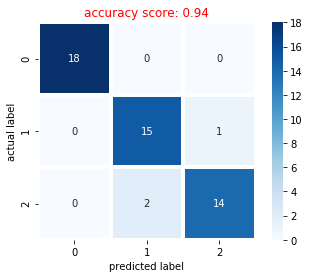

In [15]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=8)
logr.fit(X_train,y_train)

y_pred = logr.predict(x_test)


# confusion matrix and accuracy score
accuracy_score_logr = accuracy_score(y_test,y_pred,3)
cm_logr = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_logr, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Blues',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'accuracy score: {accuracy_score_logr}',size=12,color='red')
plt.show()

# KNN (k Neighbors Classifier)

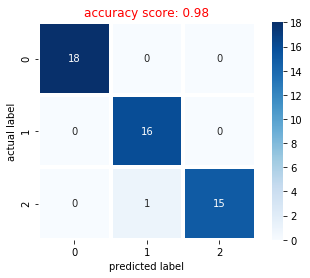

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, metric = 'minkowski')
knn.fit(X_train,y_train)

y_pred = knn.predict(x_test)


# confusion matrix and accuracy score
accuracy_score_knn = accuracy_score(y_test,y_pred,3)
cm_knn = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_knn, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Blues',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'accuracy score: {accuracy_score_knn}',size=12,color='red')
plt.show()


# SVC (Support Vector Classification- SVM Classifier)

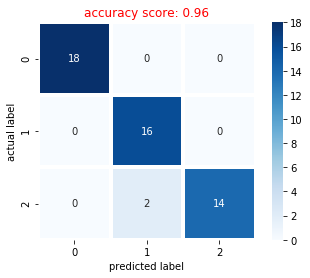

In [17]:
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf', probability=True)
svc.fit(X_train,y_train)

y_pred = svc.predict(x_test)


# confusion matrix and accuracy score
accuracy_score_svc = accuracy_score(y_test,y_pred,3)
cm_svc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_svc, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Blues',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'accuracy score: {accuracy_score_svc}',size=12,color='red')
plt.show()

I didn't use 'sigmoid' as kernal Function because 'sigmoid' return
1 or 0 so it makes sence to use sigmoid when column y has 2 kinds
whereas column y has 3 kinds of data Among the remaining
possibilities,'ploy'and 'rbf'made sense, I tried the and 'rbf'
gave beter performance, therefore i chose 'rbf'.

# Naive Bayes

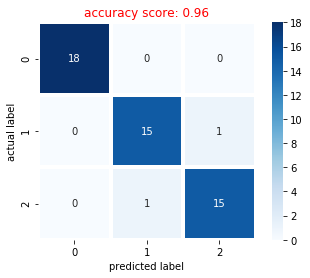

In [18]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train,y_train)

y_pred = mnb.predict(x_test)


# confusion matrix and accuracy score
accuracy_score_mnb = accuracy_score(y_test,y_pred,3)
cm_mnb = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_mnb, annot=True,fmt=".0f",linewidths=3,square=True, cmap="Blues", color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'accuracy score: {accuracy_score_mnb}',size=12,color='red')
plt.show()


why is Multinomial Naive Bayes suitable for this data set?

if te column is to predected is binomial, ie binary, ie 1 or 0, 'Bernoulli Naive Bayes'
is using . i did not use 'Bernoulli'as the y columns in this 
dataset is not binomial.(Similar to not using sigmoid in the svr just before)

if the column to be predective consiste of contunious numbers, that is,
if it consists of real numbers, 'Gaussian Naive Bayes' is used.
However in dataset,column y consists of srings, not real numbers.
That's why i didn't use Gaussan Naivw Bayes;

id the column to be preducted consista of normal's data, Multinomial
Naive Bayes' is used. In suitable with this kind of naive Bayes, column
y in this data set consists of normal data. That's why i used
"Multinomial Naive Bayes".


# Decision Tree

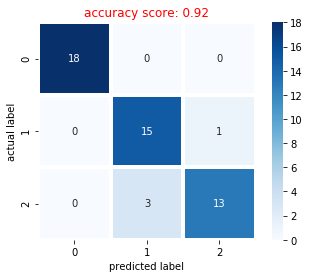

In [19]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train,y_train)

y_pred = dtc.predict(x_test)


# confusion marix and accuracy score
accuracy_score_dtc = accuracy_score(y_test,y_pred,3)
cm_dtc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dtc, annot=True,fmt=".0f",linewidths=3, square=True,
cmap='Blues', color='#cd1076')
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'accuracy score: {accuracy_score_dtc}', size=12,color='red')
plt.show()          

# Random forest

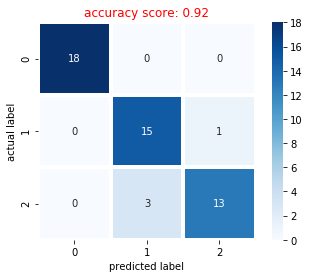

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 9, criterion = 'entropy')
rfc.fit(X_train,y_train)

y_pred = rfc.predict(x_test)


# confusion matrix and accuracy score
accuracy_score_rfc = accuracy_score(y_test,y_pred,3)
cm_rfc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_rfc, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Blues',color='#cd1076')
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'accuracy score: {accuracy_score_rfc}',size=12,color='red')
plt.show()

# Evaluating Models

first of all I would like to say that since the data set is balanced,
I will use Accuracy Score; not F1 Score' when comparing models.
if the data set was imbalanced i would use 'F1 Score'.

# cunfusion Matrix

In [21]:
print('\033[93m' + '--CONFUSION MATRICS --\n' + '\033[0m')

print(f'Logistic Regression    \n{cm_logr}\n')
print(f'KNN-K Nearest Neighbors /n {cm_knn}\n')
print(f'SVC-Support Vector Classifier\n{cm_svc}\n')
print(f'Multinomial Naive Bayes   \n{cm_mnb}\n')
print(f'Decision Tree Classifier   \n{cm_dtc}\n')
print(f'Random Forest Classifier    \n{cm_rfc}\n')

--CONFUSION MATRICS --

Logistic Regression    
[[18  0  0]
 [ 0 15  1]
 [ 0  2 14]]

KNN-K Nearest Neighbors /n [[18  0  0]
 [ 0 16  0]
 [ 0  1 15]]

SVC-Support Vector Classifier
[[18  0  0]
 [ 0 16  0]
 [ 0  2 14]]

Multinomial Naive Bayes   
[[18  0  0]
 [ 0 15  1]
 [ 0  1 15]]

Decision Tree Classifier   
[[18  0  0]
 [ 0 15  1]
 [ 0  3 13]]

Random Forest Classifier    
[[18  0  0]
 [ 0 15  1]
 [ 0  3 13]]



# Accuracy Scores

In [22]:
# Let's create a data frame and show scores.

NamesOfAlgorithms_df = pd.DataFrame(['Logistic Regression','KNN - K Nearest Neighbors','SVC - Support Vector Classifier','Multinomial Naive Bayes','Decision Tree Classifier','Random Forest Classifier'])
AcScoresOfAlgorithms_df = pd.DataFrame([accuracy_score_logr,accuracy_score_knn,accuracy_score_svc,accuracy_score_mnb,accuracy_score_dtc,accuracy_score_rfc])

df3 = pd.concat([NamesOfAlgorithms_df,AcScoresOfAlgorithms_df],axis=1)
df3.columns=['ALGORİTHM','ACCURACY SCORE',]

print(df3)

                         ALGORİTHM  ACCURACY SCORE
0              Logistic Regression            0.94
1        KNN - K Nearest Neighbors            0.98
2  SVC - Support Vector Classifier            0.96
3          Multinomial Naive Bayes            0.96
4         Decision Tree Classifier            0.92
5         Random Forest Classifier            0.92


KNN has the highest accuracy socore.

In [23]:
# To better understand the Accuracy score, let's calculate it manually.
# Accuracy Score = (TP + TN) / (TP + TN + FN + FP)  
#                = (Sum of Main Diagonal Values) / (Sum of All Matrix Values)

print('\033[1m' + 'Number of predictions of all algorithms: 50\n' + '\033[0m')

truePredictsNumber_logr = cm_logr[0][0] + cm_logr[1][1] + cm_logr[2][2]
print('\033[4m' + 'Logistic Regression' + '\033[0m')
print(f'True Predicts: {truePredictsNumber_logr}')
print(f'True Predicts Ratio: {truePredictsNumber_logr/50:.2f} \n')

truePredictsNumber_knn = cm_knn[0][0] + cm_knn[1][1] + cm_knn[2][2]
print('\033[4m' + 'KNN' + '\033[0m')
print(f'True Predicts: {truePredictsNumber_knn}')
print(f'True Predicts Ratio: {truePredictsNumber_knn/50:.2f} \n')

truePredictsNumber_svc = cm_svc[0][0] + cm_svc[1][1] + cm_svc[2][2]
print('\033[4m' + 'SVC' + '\033[0m')
print(f'True Predicts: {truePredictsNumber_svc}')
print(f'True Predicts Ratio: {truePredictsNumber_svc/50:.2f} \n')

truePredictsNumber_mnb = cm_mnb[0][0] + cm_mnb[1][1] + cm_mnb[2][2]
print('\033[4m' + 'Naive Bayes' + '\033[0m')
print(f'True Predicts: {truePredictsNumber_mnb}')
print(f'True Predicts Ratio: {truePredictsNumber_mnb/50:.2f} \n')

truePredictsNumber_dtc = cm_dtc[0][0] + cm_dtc[1][1] + cm_dtc[2][2]
print('\033[4m' + 'Decision Tree' + '\033[0m')
print(f'True Predicts: {truePredictsNumber_dtc}')
print(f'True Predicts Ratio: {truePredictsNumber_dtc/50:.2f} \n')

truePredictsNumber_rfc = cm_rfc[0][0] + cm_rfc[1][1] + cm_rfc[2][2]
print('\033[4m' + 'Random Forest' + '\033[0m')
print(f'True Predicts: {truePredictsNumber_rfc}')
print(f'True Predicts Ratio: {truePredictsNumber_rfc/50:.2f}')

Number of predictions of all algorithms: 50

Logistic Regression
True Predicts: 47
True Predicts Ratio: 0.94 

KNN
True Predicts: 49
True Predicts Ratio: 0.98 

SVC
True Predicts: 48
True Predicts Ratio: 0.96 

Naive Bayes
True Predicts: 48
True Predicts Ratio: 0.96 

Decision Tree
True Predicts: 46
True Predicts Ratio: 0.92 

Random Forest
True Predicts: 46
True Predicts Ratio: 0.92


Notice that the values we found using the 'accuracy_score' in the 'sklearn library are the same as the values we found manually.

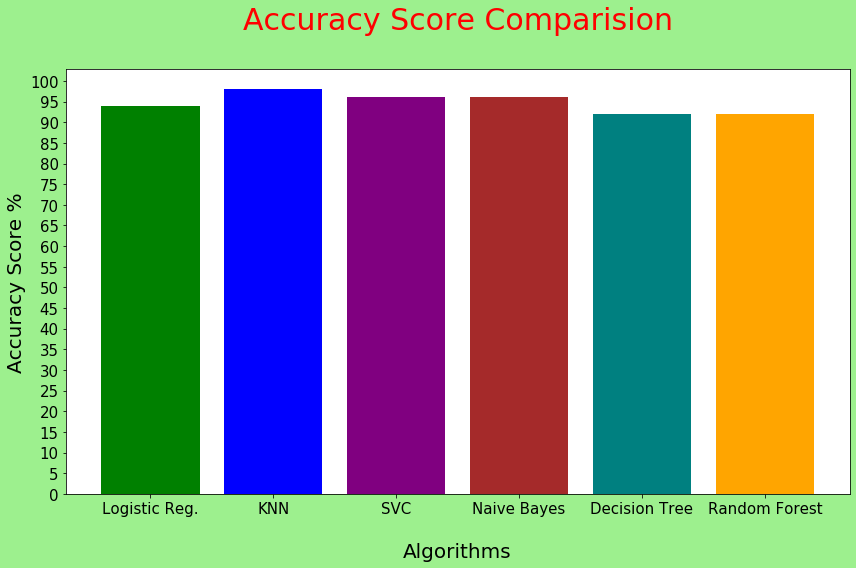

In [24]:
# Let's compare the accuracy scores on the bar graph.

algorithms_names = np.array(['Logistic Reg.','KNN','SVC','Naive Bayes','Decision Tree','Random Forest'])
accuracy_scores = np.array([accuracy_score_logr,accuracy_score_knn,accuracy_score_svc,accuracy_score_mnb,accuracy_score_dtc,accuracy_score_rfc])
accuracy_scores = accuracy_scores*100

plt.figure(figsize = (12,8),facecolor='#9DF08E')
colors_set = ['green','blue','purple','brown','teal','orange']
plt.bar(x=algorithms_names, height=accuracy_scores, color = colors_set)
plt.title('Accuracy Score Comparision\n', fontsize=30, color = 'red')
plt.xlabel('\nAlgorithms', fontsize=20)
plt.ylabel('Accuracy Score %', fontsize=20)
plt.xticks(horizontalalignment='center', fontsize='15')
plt.yticks(np.arange(0,101,5),fontsize='15')
plt.tight_layout()
plt.show()

# conclusion 

. The algorithm with the highest accuracy score in the 
classification of the iris dataset was KNN.

Since the data set is very clean, the score of other algorithms
other than KNN was also very hight, maybe some of the could have achive 
a slighty hght score, But this also affects the cost negatively.
For example, in Randome Forest, we can increse the number of n_estimators even more,
maybe good result, but if our data set consisted of thousands
of row instead of 150 row this would cause the algorithem to work slowly.

. This highest correlaton is between petal Length Cm and petal
WidthCm with a value of 0.96. Also, the correlation between 
petalLengthcm - SepalWidthCm is -0.42, meaning that as one increase, the other decreses, and vice versa.